## Measuring Cp/Cv
<bk>
Shreya Parjan (+Alex)
<bk>
1 Oct 2018

The purpose of this lab is to measure gamma, the ratio of the specific heat capacity under constant pressure to the specific heat capacity under constant volume, for air and argon. A plunger apparatus was used, in which we observed the plunger's oscillation frequency at varying volumes.

### Imports

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import scipy.optimize
import math as m
%matplotlib inline

### Measured Data

In [33]:
initPressure = 102900 #Pa
mass = .07 #kg
g = 9.8 #m/s^2
diameter = .03048 #m

airVolume = np.array([40,30,20,46,36])/(100**3) #m^3
airPeriod = np.array([(142/3),(124/3),(70/2),(200/4),(220/5)])/1000 #s

argonVolume = np.array([40,30,46,36,20])/(100**3) #m^3
argonPeriod = np.array([(220/5),(190/5),(188/4),(206/5),(196/6)])/1000 #s

area = np.pi*((diameter/2)**2) #m^2
syringePressure = ((initPressure*area)+(mass*g))/area #Pa

### Graphs

[0.00224044 0.00170844 0.001225   0.0025     0.001936  ]
y-intercept =  0.00022574673882571602
slope =  49.309041831782764
uncertainties:  [8.13801576e-05 2.29044588e+00]


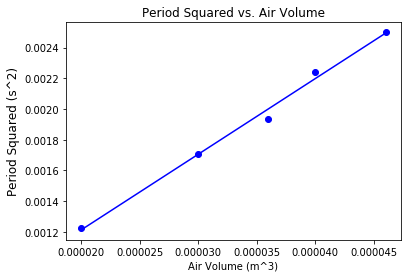

In [34]:
airPeriodSquared = airPeriod**2
print(airPeriodSquared)
def straight_line_model(x, A, B):
    return A + B * x

popt_air, pcov = scipy.optimize.curve_fit(straight_line_model, airVolume, airPeriodSquared)
yIntercept = popt_air[0]
slope = popt_air[1]
print('y-intercept = ',yIntercept)
print('slope = ',slope)

airVolume_for_plot = np.linspace(airVolume.min(), airVolume.max(), 50)
best_fit_line = straight_line_model(airVolume_for_plot, popt_air[0], popt_air[1])

#calculates uncertainties for both variables
popt_air_uncertainties = np.sqrt(np.diag(pcov)) # get the diagonal elements then take sqrt
print('uncertainties: ', popt_air_uncertainties)

plt.plot(airVolume, airPeriodSquared, 'bo') #without '-' after bo, plots points alone
plt.plot(airVolume_for_plot, best_fit_line, 'b') # adds best fit line

plt.xlabel('Air Volume (m^3)') # label the x-axis
plt.ylabel('Period Squared (s^2)', size=12) # label the y-axis

plt.title('Period Squared vs. Air Volume') # title
plt.show()

y-intercept =  0.00015074691081365849
slope =  44.184979967896965
uncertainties:  [7.31440098e-05 2.05863936e+00]


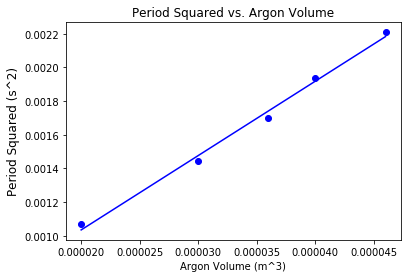

In [35]:
argonPeriodSquared = argonPeriod**2

def straight_line_model(x, A, B):
    return A + B * x

popt_argon, pcov = scipy.optimize.curve_fit(straight_line_model, argonVolume, argonPeriodSquared)
yIntercept = popt_argon[0]
slope = popt_argon[1]
print('y-intercept = ',yIntercept)
print('slope = ',slope)

argonVolume_for_plot = np.linspace(argonVolume.min(), argonVolume.max(), 50)
best_fit_line = straight_line_model(argonVolume_for_plot, popt_argon[0], popt_argon[1])

#calculates uncertainties for both variables
popt_argon_uncertainties = np.sqrt(np.diag(pcov)) # get the diagonal elements then take sqrt
print('uncertainties: ', popt_argon_uncertainties)

plt.plot(argonVolume, argonPeriodSquared, 'bo') #without '-' after bo, plots points alone
plt.plot(argonVolume_for_plot, best_fit_line, 'b') # adds best fit line

plt.xlabel('Argon Volume (m^3)') # label the x-axis
plt.ylabel('Period Squared (s^2)', size=12) # label the y-axis

plt.title('Period Squared vs. Argon Volume') # title
plt.show()

In [36]:
slopeUncertaintyAir = (popt_air_uncertainties[1])
slopeAir = popt_air[1] #Slope is equivalent to this expression, found from (20) in the lab handout: (Pressure_e*Area^2*gamma)/(4pi*m)
gammaAir = (4*np.pi**2*mass)/(slopeAir*syringePressure*area**2)
print("Gamma for air = ",gammaAir)

#to find the uncertainty in gammaAir, dG, we use the equation (dG/gammaAir) = (dSlope/slopeAir)
#dG = (dSlope/slopeAir)*gammaAir
gammaAirUncertainty = (slopeUncertaintyAir/slopeAir)*gammaAir
print("The uncertainty in gammaAir is: ",gammaAirUncertainty)

Gamma for air =  1.0137391715867612
The uncertainty in gammaAir is:  0.04708902501771737


In [37]:
slopeUncertaintyArgon = (popt_argon_uncertainties[1])
slopeArgon = popt_argon[1] #Slope is equivalent to this expression, found from (20) in the lab handout: (Pressure_e*Area^2*gamma)/(4pi*m)
gammaArgon = (4*np.pi**2*mass)/(slopeArgon*syringePressure*area**2)
print("Gamma for argon = ",gammaArgon)

gammaArgonUncertainty = (slopeUncertaintyArgon/slopeArgon)*gammaArgon
print("The uncertainty in gammaArgon is: ",gammaArgonUncertainty)

#to find the uncertainty in gammaArgon, dG, we use the equation (dG/gammaArgon) = (dSlope/slopeArgon)

Gamma for argon =  1.1313008912668197
The uncertainty in gammaArgon is:  0.05270887401128482


## Discussion

gammaArgon = 1.13 +/- 0.05
gammaAir = 1.01 +/- 0.05

Using equation 13 in the handout, the true value for the gammas can be found using: gamma = 1 + 2/f
So the true gammaArgon is 1.67 and gammaAir is 1.40

We know that gamma equals Cp/Cv. Because the value for gammaAir is about 28% greater than that of gammaArgon, we consider the difference between the gammas for the two gases to be significant. It is reasonable that gammaArgon is less than gammaAir because argon is a monatomic ideal gas while air is a compound with larger molecules.

We concur with the student because a non-zero thermal conductivity (friction) would decrease the period, resulting in a lower period squared per unit volume and, thus a higher slope. Because gamma and the ratio of the period squared to the volume are directly proportional by (20) in the lab handout, we would expect a lower gamma than expected.

## Stop to Thinks

1. The voltage measurements and extrema are sensitive to the velocity of the plunger because generating a voltage relies on a change in magnetic field which can only be done through motion. It does not matter whether we observe position or velocity for calculating frequency.

2. We assumed that the apparatus was frictionless and there was no air resistance. Therefore, we neglected how these assumptions would affect the period.

3. Because the period and omega are indirectly proportional, if the process was instead adiabatic, the period would decrease (now accounting for friction) so omega would increase.

4. It's better to measure over several oscillations because a multiple measurements reduce uncertainty in a calculation.